# Tutorial 2: Feature enginnering and selection
 

---

## Introduction

In this tutorial you will learn how to do the following:
-  Create/enginner features
-  Select features relative to thier importance
#### Let's get started!

---

First, let us retrieve the data from the previous tutorial

In [1]:
%store -r data_ModelM

In [2]:
data_ModelM.head(3)

,Mu,Mg,Mr,Mi,Mz,W1,W2,class
0,20.391554,20.329977,20.306154,20.072433,19.909691,19.481,19.015,QSO
1,22.861437,21.111048,20.074354,19.361259,19.039858,18.680,19.090,GALAXY
2,22.322790,22.327713,20.546944,19.670311,19.139175,18.357,19.007,GALAXY


Importing some libraries:

In [3]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt
import numpy as np

---

some explentaion here why are we creating all of those features

<b><i> Creating color features </i></b> 


In [4]:
data_ModelM['Mu-g'] = data_ModelM['Mu']- data_ModelM['Mg']
data_ModelM['Mu-r'] = data_ModelM['Mu']- data_ModelM['Mr']
data_ModelM['Mu-i'] = data_ModelM['Mu']- data_ModelM['Mi']
data_ModelM['Mu-z'] = data_ModelM['Mu']- data_ModelM['Mz']

data_ModelM['Mg-r'] = data_ModelM['Mg']- data_ModelM['Mr']
data_ModelM['Mg-i'] = data_ModelM['Mg']- data_ModelM['Mi']
data_ModelM['Mg-z'] = data_ModelM['Mg']- data_ModelM['Mz']

data_ModelM['Mr-i'] = data_ModelM['Mr']- data_ModelM['Mi']
data_ModelM['Mr-z'] = data_ModelM['Mr']- data_ModelM['Mz']

data_ModelM['Mi-z'] = data_ModelM['Mi']-data_ModelM['Mz']

In [5]:
print(data_ModelM.shape) # so we added exactly 10 more features/colors

(3500958, 18)


<b><i> Adding WISE colors </i></b> 

In [6]:
data_ModelM['Mu-w1'] = data_ModelM['Mu']- data_ModelM['W1']
data_ModelM['Mu-w2'] = data_ModelM['Mu']- data_ModelM['W2']

data_ModelM['Mg-w1'] = data_ModelM['Mg']- data_ModelM['W1']
data_ModelM['Mg-w2'] = data_ModelM['Mg']- data_ModelM['W2']

data_ModelM['Mr-w1'] = data_ModelM['Mr']- data_ModelM['W1']
data_ModelM['Mr-w2'] = data_ModelM['Mr']- data_ModelM['W2']

data_ModelM['Mi-w1'] = data_ModelM['Mi']- data_ModelM['W1']
data_ModelM['Mi-w2'] = data_ModelM['Mi']- data_ModelM['W2']


data_ModelM['Mz-w1'] = data_ModelM['Mz']- data_ModelM['W1']
data_ModelM['Mz-w2'] = data_ModelM['Mz']- data_ModelM['W2']

data_ModelM['w1-w2'] = data_ModelM['W1']- data_ModelM['W2']


In [7]:
print(data_ModelM.shape)
print( "Rows: "+ str(data_ModelM.shape[0]) )
print( "Col: "+ str(data_ModelM.shape[1]) ) # where there are about 28 features, and the extra is for the output "specclass"

(3500958, 29)
Rows: 3500958
Col: 29


---

Now dealing with this amount of features is a difficult task, however there lots of tools that can be used to reduce the features:

**Manual** feature reduction: where a user can manually select the most relevant features
-  Feature importance: where we can manually selec the most N importnat features (where n is the number of features)
-  Feature correlation: where we can manually remove haighly correlated features
**Automatic** feature reduction: where features are reduced automatically:
- principal component analysis
- CNNs (deep learning)

---

<b><i> Feature reduction </i></b> 

In this section, we will show how we reduce the features using *[Permutation Importance](https://www.kaggle.com/code/dansbecker/permutation-importance/tutorial)*.

first, let us split the data into inputs (X) and output (y) 

In [8]:
X = data_ModelM.drop(['class'], axis = 1)
y = data_ModelM['class']
print(X.shape) # our input
print(y.shape) # our input

(3500958, 28)
(3500958,)


To avoid data leakage, we need to perform feature permutation only on the training set, therefore we need to split the data into training and testing

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets


In [10]:
print(Xtrain.shape)
print(Xtest.shape)

(2100574, 28)
(1400384, 28)


permutation methods requires that we use a ML tool to evalute the importance of the features, we will be useing random forest (RF) for this task.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

*train the model*

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = 32) # define the machine learning model
model.fit(Xtrain, Ytrain)

RandomForestClassifier(n_jobs=32, random_state=0)

*permutation*

In [13]:
results = permutation_importance(model, Xtrain, Ytrain, scoring='f1_micro', n_repeats = 5, n_jobs = -1) # perform permutation importance
importance = results.importances_mean

In [14]:
%store importance

Stored 'importance' (ndarray)


now let us visualise the feature importance

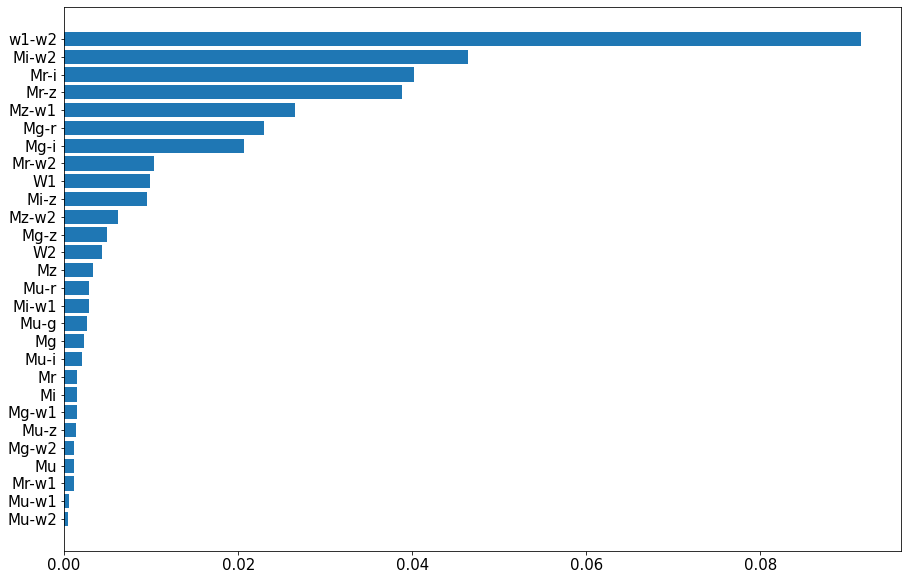

In [16]:
plt.rcParams["figure.figsize"] = (15,10) # 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['ytick.labelsize'] = 15     # 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['xtick.labelsize'] = 15     # 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sorted_idx = importance.argsort()

plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.show()

In [19]:
print(list(X.columns[sorted_idx][-7:])) # the best 7 features from right to left

['Mg-i', 'Mg-r', 'Mz-w1', 'Mr-z', 'Mr-i', 'Mi-w2', 'w1-w2']


---

<b><i>Data visualization using the best 7 engineered features</i></b> 

for some reason, I decided to take only the first 7 features, which I will focus on this analysis and the classification task in the next tutorial. you can try 8 if you want

In [23]:
X_imp = X[X.columns[sorted_idx][-7:]]
data_imp = data_ModelM [X.columns[sorted_idx][-7:]]
data_imp = data_imp.join(data_ModelM [['class']])

In [25]:
print(data_imp.head(3))
print(data_imp.shape)

       Mg-i      Mg-r     Mz-w1      Mr-z      Mr-i     Mi-w2  w1-w2   class
0  0.257544  0.023823  0.428691  0.396463  0.233721  1.057434  0.466     QSO
1  1.749788  1.036694  0.359858  1.034496  0.713095  0.271259 -0.410  GALAXY
2  2.657402  1.780769  0.782175  1.407768  0.876633  0.663311 -0.650  GALAXY
(3500958, 8)


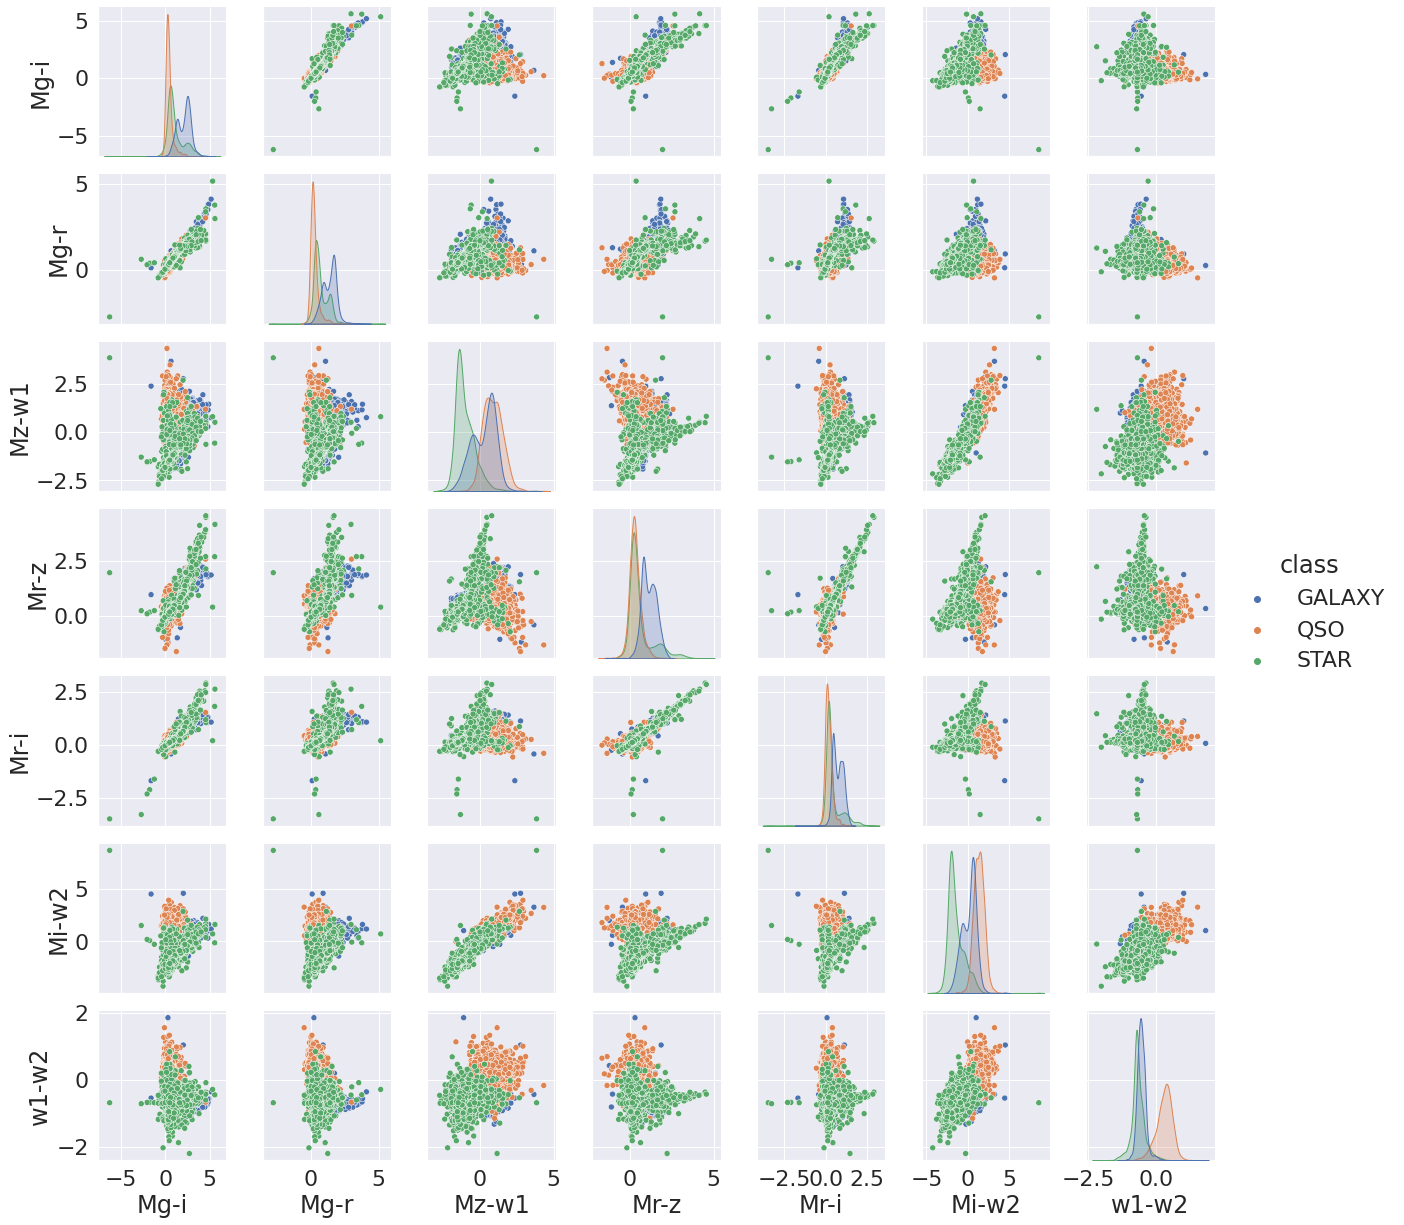

In [26]:
sample_data_imp = data_imp.groupby('class', group_keys=False).apply(lambda x: x.sample(2000)) # ranomly selects 2000 samples from each class (https://www.geeksforgeeks.org/python-pandas-dataframe-sample/)

sns.set(font_scale=2)
sns.pairplot(sample_data_imp, hue="class")

The above is my final data set :D, now I need to save them to work with them in the next tutorial (notebook)

In [27]:
%store X_imp
%store y
%store data_imp

Stored 'X_imp' (DataFrame)
Stored 'y' (Series)
Stored 'data_imp' (DataFrame)


--- 

Do the same for the other feature groups (cmodelmag, psfmodelmag), and see which give better seperation between them if any at all.